In [1]:
!pip install -Uqq fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 96.6 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *
def is_cat(x): return x[0].isupper()

In [3]:
path = untar_data(URLs.PETS)/'images'

dls= ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

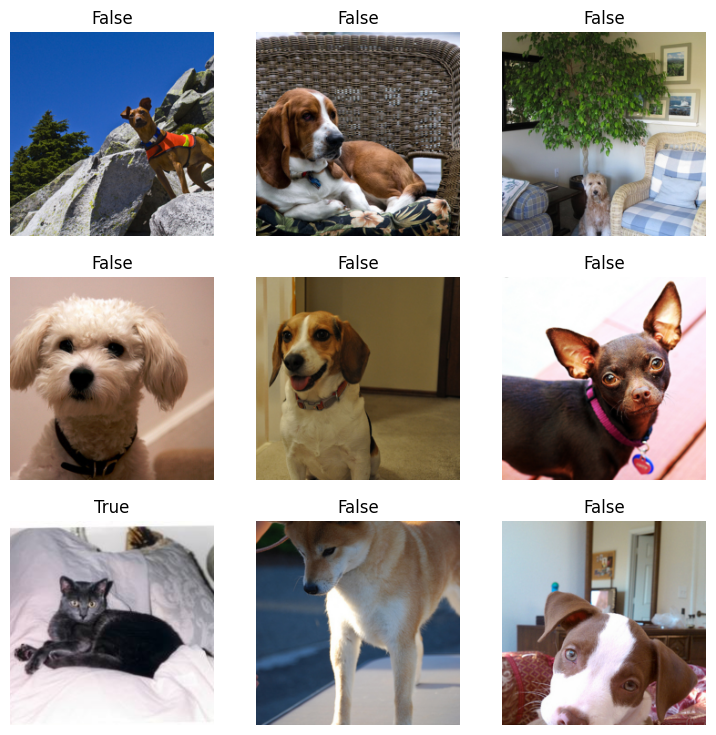

In [4]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 28.2MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.140737,0.028085,0.004736,22:38


epoch,train_loss,valid_loss,error_rate,time
0,0.056251,0.022072,0.008119,34:49
1,0.044798,0.024287,0.007442,34:59
2,0.018671,0.010294,0.003383,34:54


In [7]:
learn.export('model.pkl')